<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code-Setup" data-toc-modified-id="Code-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code Setup</a></span><ul class="toc-item"><li><span><a href="#Acronyms-and-abbreviations" data-toc-modified-id="Acronyms-and-abbreviations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Acronyms and abbreviations</a></span></li></ul></li><li><span><a href="#Establish-Data-Frames" data-toc-modified-id="Establish-Data-Frames-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Establish Data Frames</a></span><ul class="toc-item"><li><span><a href="#Read-ENM-data" data-toc-modified-id="Read-ENM-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read ENM data</a></span></li><li><span><a href="#ENM-dataframes" data-toc-modified-id="ENM-dataframes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ENM dataframes</a></span></li><li><span><a href="#ENM-WF-bins" data-toc-modified-id="ENM-WF-bins-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ENM WF bins</a></span></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Preliminary-performance-check" data-toc-modified-id="Preliminary-performance-check-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preliminary performance check</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Hierarchical-Agglomerative-Clustering-(HAC)" data-toc-modified-id="Hierarchical-Agglomerative-Clustering-(HAC)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hierarchical Agglomerative Clustering (HAC)</a></span><ul class="toc-item"><li><span><a href="#Helper-class-for-selecting-best-ENM-estimator" data-toc-modified-id="Helper-class-for-selecting-best-ENM-estimator-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Helper class for selecting best ENM estimator</a></span></li><li><span><a href="#Pipeline/GridSearch-to-select-n_clusters" data-toc-modified-id="Pipeline/GridSearch-to-select-n_clusters-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Pipeline/GridSearch to select n_clusters</a></span></li><li><span><a href="#Apply-feature-agglomeration-using-optimized-n_clusters" data-toc-modified-id="Apply-feature-agglomeration-using-optimized-n_clusters-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Apply feature agglomeration using optimized n_clusters</a></span></li></ul></li></ul></li><li><span><a href="#Core-models" data-toc-modified-id="Core-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Core models</a></span><ul class="toc-item"><li><span><a href="#Clustering,-regression-Model" data-toc-modified-id="Clustering,-regression-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clustering, regression Model</a></span></li><li><span><a href="#PCA,-regression-Model" data-toc-modified-id="PCA,-regression-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PCA, regression Model</a></span></li><li><span><a href="#Compare-feature-predictivity" data-toc-modified-id="Compare-feature-predictivity-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Compare feature predictivity</a></span></li><li><span><a href="#PCA,-WF-Bins" data-toc-modified-id="PCA,-WF-Bins-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>PCA, WF Bins</a></span></li><li><span><a href="#NEW-ENM-Model-(Clusters)" data-toc-modified-id="NEW-ENM-Model-(Clusters)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>NEW ENM Model (Clusters)</a></span></li><li><span><a href="#NEW-ENM-Model-(PCA)" data-toc-modified-id="NEW-ENM-Model-(PCA)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>NEW ENM Model (PCA)</a></span></li></ul></li></ul></div>

# Code Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "BLTfigs"

In [5]:
import os
#os.chdir(path)
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory did not exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.')

Figure directory exists.


In [6]:
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

In [7]:
# To enable a specified sound to play
from IPython.display import Audio
sound_file = './data/Glass.wav'

# Add the following to the end of a cell with a long run time
# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

In [8]:
# Shift tab to understand function components
# Type questionmark before function to bring up help

## Acronyms and abbreviations

In [9]:
# enm = engineered nanomaterial
# mw = molecular weight
# oecd = Organisation for Economic Co-operation and Development
# prop = property
# PUC = product use category
# wf = weight fraction

# Establish Data Frames

## Read ENM data

In [27]:
# Read in engineered nanomaterials (ENM) weight fraction data and potential predictive variables
X_enm = pd.read_csv("./data/ENM_conc_export.csv", sep=',', header='infer') #, usecols=range(0,34), nrows=60

# Drop unwanted columns
    # For PUC, keeping getcat, group, refined, assigned ("matrix")
    # Drop dehydrating_agent[22],dispersing_agent[24],fuel_agent[27]
X_enm.drop(X_enm.columns[[0,1,2,3,4,9,12,22,24,27,34,35,36]], axis=1, inplace=True)

# Rename PUC columns
X_enm.rename(columns = {'gencatID':'gen'}, inplace = True)
X_enm.rename(columns = {'refined_product_type':'refined'}, inplace = True)
X_enm.rename(columns = {'assignedID':'matrix'}, inplace = True)

In [28]:
# Find and replace (clean data)

# To maintain atomicity, assign all child-specific products (C) as articles (A) (there were no formulas) 
    # and all OTC pharmaceuticals (P) as formulas (F) (they were all liquids)
X_enm['matrix'] = X_enm['matrix'].replace('C','A', regex=True)
X_enm['matrix'] = X_enm['matrix'].replace('P','F', regex=True)
#list(X_enm.assigned.values)

# Clean up data in refined column so it's only spray vs NOC
X_enm['refined'] = X_enm['refined'].replace('child','NOC', regex=True)
X_enm['refined'] = X_enm['refined'].replace('exterior','NOC', regex=True)
X_enm['refined'] = X_enm['refined'].replace('interior','NOC', regex=True)
X_enm['refined'] = X_enm['refined'].replace('soft','NOC', regex=True)
X_enm['refined'] = X_enm['refined'].replace('plastic','NOC', regex=True)

# Rename functions to match organics dataset
X_enm.rename(columns = {'antistain_agent':'antiredeposition_agent'}, inplace = True)
X_enm.rename(columns = {'lubricating_agent':'anti_adhesive_cohesive'}, inplace = True)

# Move anti_adhesive_cohesive column up in order
cols = X_enm.columns.tolist()
cols = cols[:9]+[cols[-4]]+cols[9:20]+cols[21:]
X_enm = X_enm[cols]

In [29]:
# Transform factor data (product categories) into binary columns
X_enm=pd.get_dummies(X_enm, prefix=["gen","group","refined","matrix"], columns=["gen","group","refined","matrix"])

# Remove spaces from column names
X_enm.columns = X_enm.columns.str.replace(' ','')
X_enm.columns = X_enm.columns.str.replace('/','')

#X_enm.loc[69:73,]
X_enm.head(4)

,propMW,propMP,propBP,propDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_nutritionalsupplements,group_paintstainandrelatedproducts,group_portableairprocessing,group_sunscreen,group_surfacesealers,group_toys,refined_NOC,refined_spray,matrix_A,matrix_F
0,79.867,1843.00,2972.0,4.230,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,63.546,1083.00,2567.0,8.960,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,65.370,419.53,907.0,7.140,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,107.868,961.78,2162.0,10.345,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
# Sum columns
X_enm.sum(axis=0)

propMW                                        8919.998
propMP                                      109340.950
propBP                                      203338.900
propDensity                                    693.180
absorbent                                        5.000
anti_adhesive_cohesive                           5.000
antioxidant                                      2.000
antiredeposition_agent                           2.000
biocide                                         40.000
brightener                                       6.000
chemical_reaction_regulator                      2.000
colorant                                         4.000
dehydrating_agent                                1.000
dispersing_agent                                 1.000
flavouring_nutrient                             22.000
fuel_agent                                       1.000
humectant                                        7.000
opacifier                                        5.000
uv_stabili

In [31]:
# Export column headings list
cols = X_enm.columns.tolist()
with open('./data/2018-10-31_enm-headers.txt', 'w') as filehandle:  
    for listitem in cols:
        filehandle.write('%s\n' % listitem)

In [210]:
# Read in ENM maximum_weight_fraction data
y_enm = pd.read_csv("./data/ENM_conc_export.csv", sep=',', header='infer', usecols=[3])

In [211]:
# Array for ENM function and product categories
yarr_enm = np.array(y_enm.maximum_weight_fraction)
print(yarr_enm.shape)

(82,)


## ENM dataframes

Split ENM-WF into separate dataframes.

In [212]:
# Dataframe for ENM function and product categories
Xfp_enm=pd.DataFrame(X_enm)
# Drop unwanted columns
Xfp_enm.drop(Xfp_enm.columns[0:4], axis=1, inplace=True) # drop chem props
enm_all_names=list(Xfp_enm.columns.values)
#enm_all_names

In [213]:
# Array for ENM function and product categories
Xfp_enm=np.array(Xfp_enm)
print(Xfp_enm.shape)

(82, 52)


In [214]:
# Dataframe for only ENM functional use categories
Xf_enm=pd.DataFrame(X_enm)
# Drop unwanted columns
Xf_enm.drop(Xf_enm.columns[0:4], axis=1, inplace=True) # drop chem props
Xf_enm.drop(Xf_enm.columns[16:], axis=1, inplace=True) # drop product categories
enm_func_names=list(Xf_enm.columns.values)
enm_func_names

['absorbent',
 'anti_adhesive_cohesive',
 'antioxidant',
 'antiredeposition_agent',
 'biocide',
 'brightener',
 'chemical_reaction_regulator',
 'colorant',
 'deodorizer',
 'filler',
 'flavouring_nutrient',
 'hardener',
 'humectant',
 'opacifier',
 'uv_stabilizer',
 'viscosity_modifier']

In [215]:
# Array for only ENM functional use categories
Xf_enm=np.array(Xf_enm)
print(Xf_enm.shape)

(82, 16)


In [216]:
# Dataframe for only ENM product categories
Xp_enm=pd.DataFrame(X_enm)
# Drop unwanted columns
Xp_enm.drop(Xp_enm.columns[0:20], axis=1, inplace=True) # drop chem props and functions
Xp_enm.drop(Xp_enm.columns[32:], axis=1, inplace=True) # drop matrix categories
enm_PUC_names=list(Xp_enm.columns.values)
enm_PUC_names

['gen_AC',
 'gen_AP',
 'gen_CP',
 'gen_CS',
 'gen_EL',
 'gen_FC',
 'gen_HM',
 'gen_PC',
 'gen_PE',
 'gen_PH',
 'gen_VE',
 'group_apparel ',
 'group_child specific ',
 'group_cold relief',
 'group_dental care ',
 'group_deodorant ',
 'group_engine maintenance ',
 'group_fabric treatment and dye ',
 'group_facial cleansing and moisturizing ',
 'group_first aid ',
 'group_food storage ',
 'group_fungicide ',
 'group_general household cleaning ',
 'group_general moisturizing ',
 'group_large appliances ',
 'group_make-up and related ',
 'group_nutritional supplements ',
 'group_paint/stain and related products ',
 'group_portable air processing ',
 'group_sunscreen ',
 'group_surface sealers ',
 'group_toys ']

In [217]:
# Array for only ENM product categories
Xp_enm=np.array(Xp_enm)
print(Xp_enm.shape)

(82, 32)


In [218]:
# Dataframe for only ENM product categories
Xm_enm=pd.DataFrame(X_enm)
# Drop unwanted columns
Xm_enm.drop(Xm_enm.columns[0:52], axis=1, inplace=True) # drop chem props
enm_matrix_names=list(Xm_enm.columns.values)
enm_matrix_names

['refined_NOC', 'refined_spray', 'matrix_A', 'matrix_F']

In [219]:
# Array for only chemical properties
Xc_enm=pd.DataFrame(X_enm)
# Drop unwanted columns
Xc_enm.drop(Xc_enm.columns[4:], axis=1, inplace=True)

## ENM WF bins

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  7.,  8., 13.,
         7.,  9.,  2.,  3.,  1.,  2.,  1.,  4.,  0., 11.,  2.,  0.,  5.,
         2.,  0.,  0.,  3.]),
 array([-5.00e+00, -4.83e+00, -4.67e+00, -4.50e+00, -4.33e+00, -4.17e+00,
        -4.00e+00, -3.83e+00, -3.67e+00, -3.50e+00, -3.33e+00, -3.17e+00,
        -3.00e+00, -2.84e+00, -2.67e+00, -2.50e+00, -2.34e+00, -2.17e+00,
        -2.00e+00, -1.84e+00, -1.67e+00, -1.50e+00, -1.34e+00, -1.17e+00,
        -1.00e+00, -8.37e-01, -6.70e-01, -5.04e-01, -3.37e-01, -1.71e-01,
        -4.36e-03]),
 <a list of 30 Patch objects>)

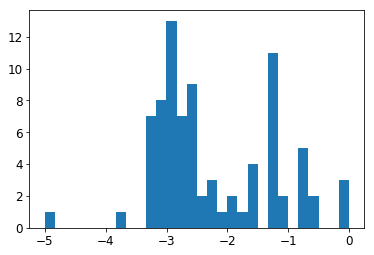

In [220]:
# Log-transformed histogram of weight fraction
plt.hist(np.log10(yarr_enm), bins=30) #

In [221]:
y_enm_log = pd.DataFrame(np.log10(yarr_enm)) #['maximum_weight_fraction']

In [222]:
# Define function to assign weight fractionchemical content s to bins per Isaacs et al. 2016
def bins(row):
    if row['maximum_weight_fraction'] <= 0.002:
        val = 'bottom'
    elif row['maximum_weight_fraction'] > 0.05:
        val = 'top'
    else:
        val = 'middle'
    return val

bin_enm = y_enm
bin_enm['bin_enm'] = bin_enm.apply(bins, axis=1)

In [223]:
# Apply function to assign weight fractions to bins that were log10-transformed
#bin_enm = pd.DataFrame(np.log10(yarr_enm))
#bin_enm['bin_enm'] = bin_enm.apply(bins, axis=1)

In [224]:
print(bin_enm.shape)

(82, 2)


In [225]:
# Use label encoder to make bins compatible with Scikit-Learn
from sklearn import preprocessing
le2 = preprocessing.LabelEncoder()
# Fit the encoder to the categorical column
bin_num_enm = le2.fit_transform(bin_enm['bin_enm'])
# Transform categories into integers
le2.transform(bin_enm['bin_enm'])
# Convert a list of integers into their category names
print('[0, 1, 2]')
print(list(le2.inverse_transform([0,1,2])))
print('bin_num_enm shape: {}'.format(bin_num_enm.shape))

[0, 1, 2]
['bottom', 'middle', 'top']
bin_num_enm shape: (82,)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [226]:
bin_num_enm

array([2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0])

Text(0.5,1,'Frequency of ENM Weight Fraction Bins')

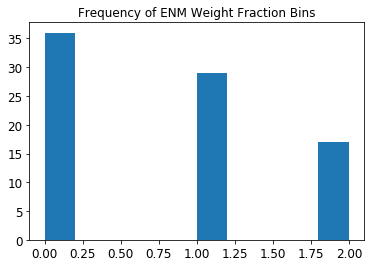

In [227]:
#plt.hist(bin_enm['bin_enm'])
plt.hist(bin_num_enm)
plt.title('Frequency of ENM Weight Fraction Bins')

# Pre-processing

## Preliminary performance check

In [177]:
# SVR-RBF with all features, normalized
    # Log-transformed weight fractions (NOT BINS!)
    # Explained variance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# Pipeline
estimator = SVR(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[0.1, 1, 10, 20, 40, 50, 70]
gamma_set=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_enm,np.log10(yarr_enm))
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 40, 'estimator__gamma': 0.0001}
0.022553011001659462


## PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

***Need to add in cross-validation***

In [178]:
# Scale the data first (i.e., the chemical properties) so everything is from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_enm_scaled = scaler.fit_transform(X_enm)

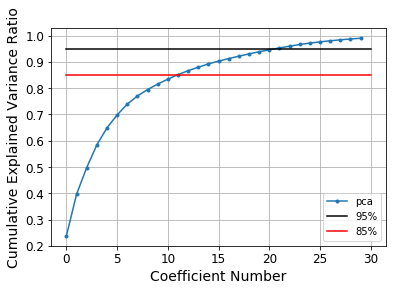

In [179]:
# Figure out number of components to achieve 85% cumulative explained variance
from sklearn import decomposition 
pca=decomposition.PCA(n_components=30)
dim_red_enm=pca.fit(X_enm_scaled)

fig =plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-',label='pca')
plt.plot([0, 30],[.95,.95],'k',label='95%')
plt.plot([0, 30],[.85,.85],'r',label='85%')
#plt.xlim([15,50])
plt.xlabel('Coefficient Number')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.legend()
plt.show()

In [180]:
# PCA, 2 component
pca = decomposition.PCA(n_components=2)
pca.fit_transform(X_enm_scaled)

# Dump components relations with features:
#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pca_enm_df = pd.DataFrame(pca.components_,columns=X_enm.columns,index = ['PC-1','PC-2'])
pca_enm_df.to_csv('./data/enm_pca2component_2.csv')

In [181]:
# Transform/apply PCA
from sklearn import decomposition 
pca = decomposition.PCA(n_components=21)
dim_red_enm = pca.fit_transform(X_enm_scaled)

## Hierarchical Agglomerative Clustering (HAC)

* Feature Agglomeration sklearn http://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html
* Alternate approach
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [182]:
# Distance matrix using cosine
# ENM Functions and Product Category Features

from scipy.spatial.distance import squareform, pdist, cosine
from scipy.cluster.hierarchy import dendrogram, linkage

# https://stackoverflow.com/questions/35639571/python-pandas-distance-matrix-using-jaccard-similarity
res_enm = 1-pdist(Xfp_enm.T, 'cosine') # transform to find similarity between features (not datapoints)
distance_enm = pd.DataFrame(squareform(res_enm), index=enm_all_names, columns=enm_all_names)

In [183]:
distance_enm

,absorbent,antioxidant,antiredeposition_agent,biocide,brightener,chemical_reaction_regulator,colorant,deodorizer,filler,flavouring_nutrient,...,group_nutritional supplements,group_paint/stain and related products,group_portable air processing,group_sunscreen,group_surface sealers,group_toys,refined_NOC,refined_spray,matrix_A,matrix_F
absorbent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478091,0.000000,...,0.000000,0.000000,0.000000,0.149071,0.000000,0.000000,0.215353,0.124035,0.000000,0.273179
antioxidant,0.000000,0.000000,0.000000,0.111803,0.000000,0.000000,0.000000,0.000000,0.000000,0.301511,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.170251,0.000000,0.000000,0.172774
antiredeposition_agent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.188982,0.000000,...,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.085126,0.196116,0.000000,0.172774
biocide,0.000000,0.111803,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.000000,0.438230,...,0.438230,0.091287,0.158114,0.000000,0.000000,0.158114,0.609110,0.350823,0.612372,0.482917
brightener,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.136083,0.000000,0.000000,0.294884,0.000000,0.000000,0.299253
chemical_reaction_regulator,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170251,0.000000,0.000000,0.172774
colorant,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.133631,0.000000,...,0.000000,0.577350,0.000000,0.166667,0.000000,0.000000,0.240772,0.000000,0.000000,0.244339
deodorizer,0.000000,0.000000,0.000000,0.223607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085126,0.196116,0.182574,0.086387
filler,0.478091,0.000000,0.188982,0.000000,0.000000,0.000000,0.133631,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.534522,0.000000,0.000000,0.321745,0.296500,0.000000,0.457116
flavouring_nutrient,0.000000,0.301511,0.000000,0.438230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.564660,0.000000,0.000000,0.573025


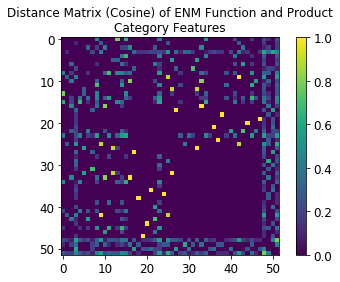

In [65]:
# ENM Functions and Product Category Features
from textwrap import wrap
fig=plt.imshow(distance_enm)
#plt.title('Distance Matrix (Cosine) of Function and Product Category Features')
plt.title("\n".join(wrap("Distance Matrix (Cosine) of ENM Function and Product Category Features", 60)))
plt.colorbar()
plt.savefig('./BLTfigs/enm_distmatrix_function-PUC_cosine.png')

Optimize the number of clusters using the elbow method, which estimates the clustering step where the acceleration of distance growth is largest.

In [66]:
# Generate linkage matrix
# ENM Functions only
from scipy.spatial.distance import squareform, pdist, cosine
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage((Xf_enm.T), method='average', metric='cosine')

# Z-array with format [idx1, idx2, dist, sample_count]
Z[:5]

array([[ 0.        , 13.        ,  0.2       ,  2.        ],
       [ 8.        , 11.        ,  0.29289322,  2.        ],
       [ 4.        , 15.        ,  0.32063378,  2.        ],
       [14.        , 17.        ,  0.48267306,  3.        ],
       [ 3.        ,  9.        ,  0.56177009,  2.        ]])

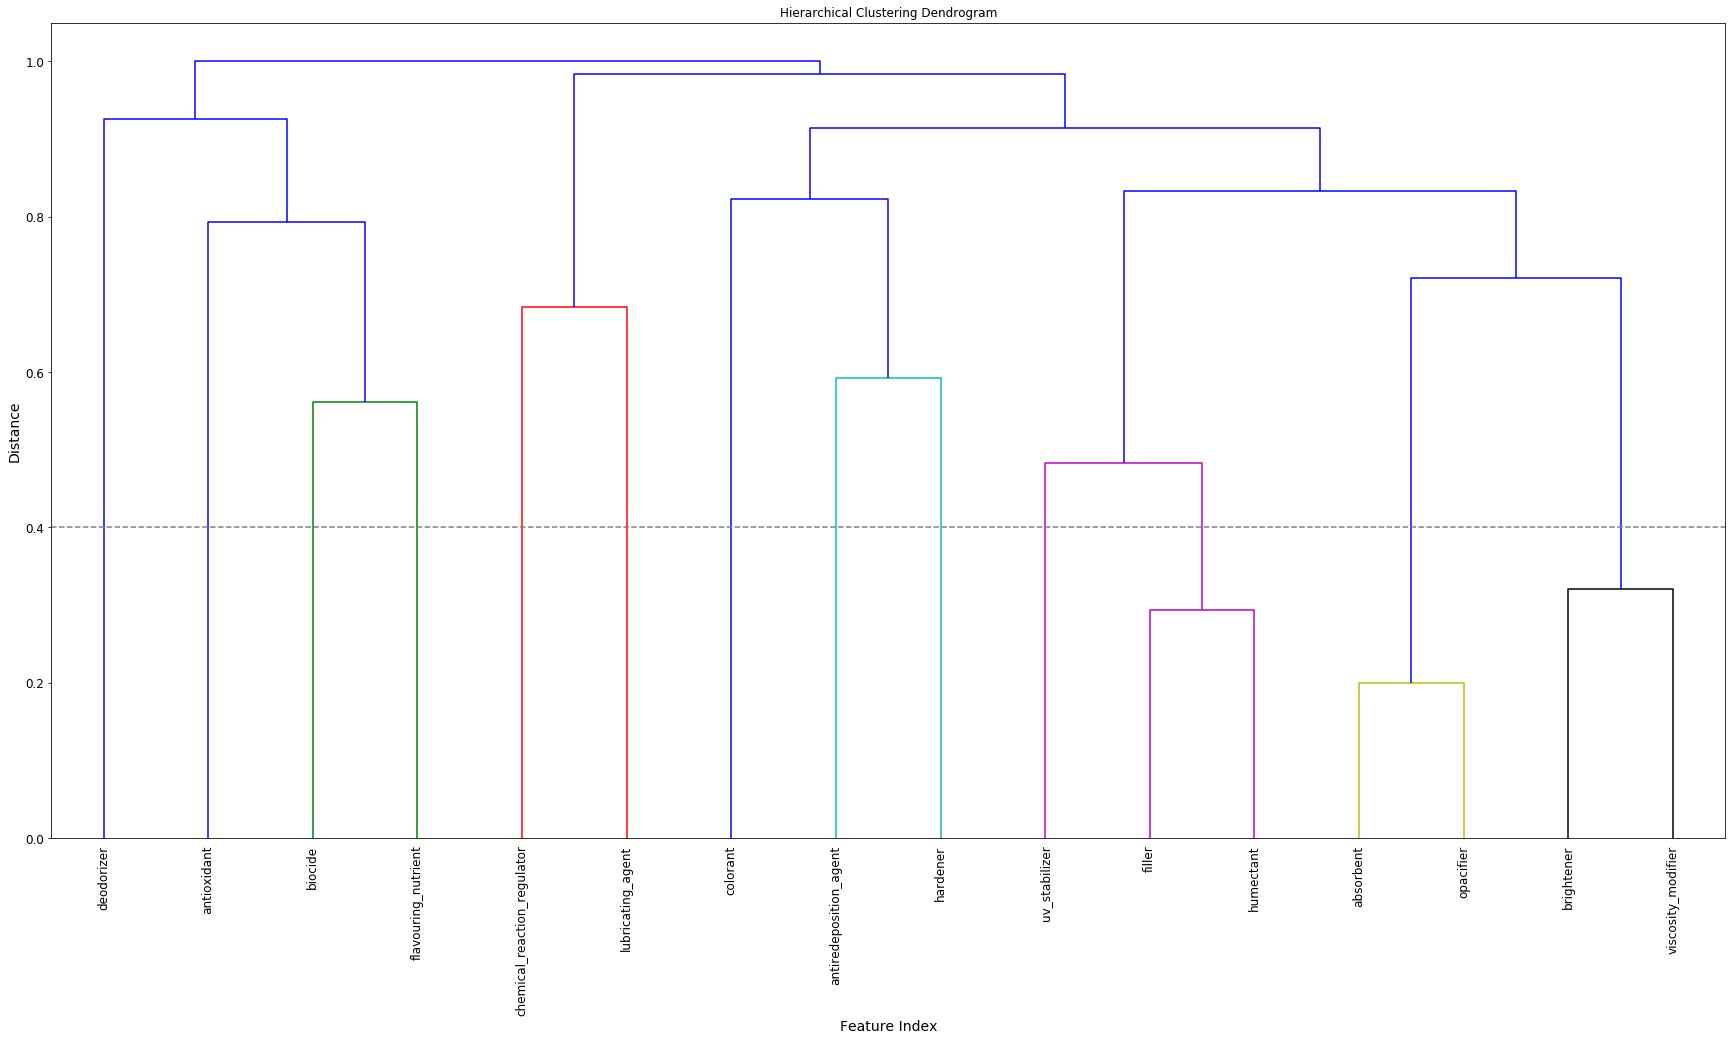

In [67]:
# Calculate full dendrogram
# ENM Functions only

fig=plt.figure(figsize=(30, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    labels=enm_func_names
)
plt.axhline(y=0.4, color='gray', linestyle='--')
plt.show()
savepdf(fig,'enm_cluster_dendrogram_func-only')

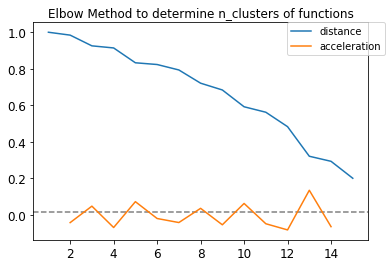

clusters: 13


In [68]:
# Optimize n_clusters with Elbow Method
# ENM functions only

last = Z[-16:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

plt.plot(idxs, last_rev, label='distance')
plt.axhline(y=0.016, color='gray', linestyle='--')
plt.plot(idxs[:-2] + 1, acceleration_rev, label='acceleration')
plt.title('Elbow Method to determine n_clusters of functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
#plt.xlim([10,62])
#plt.ylim([-.05,.1])
plt.savefig('./BLTfigs/enm_elbow_func-only.png')
plt.show()

k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

# look for spikes in orange
# 13,10,8

Now to repeat with ENM product categories.

In [69]:
# Generate linkage matrix
# ENM PUCs only
Z = linkage((Xp_enm.T), method='average', metric='cosine')
# Z-array with format [idx1, idx2, dist, sample_count]
np.savetxt("./BLTfigs/Z_puc.csv", Z, delimiter=",")

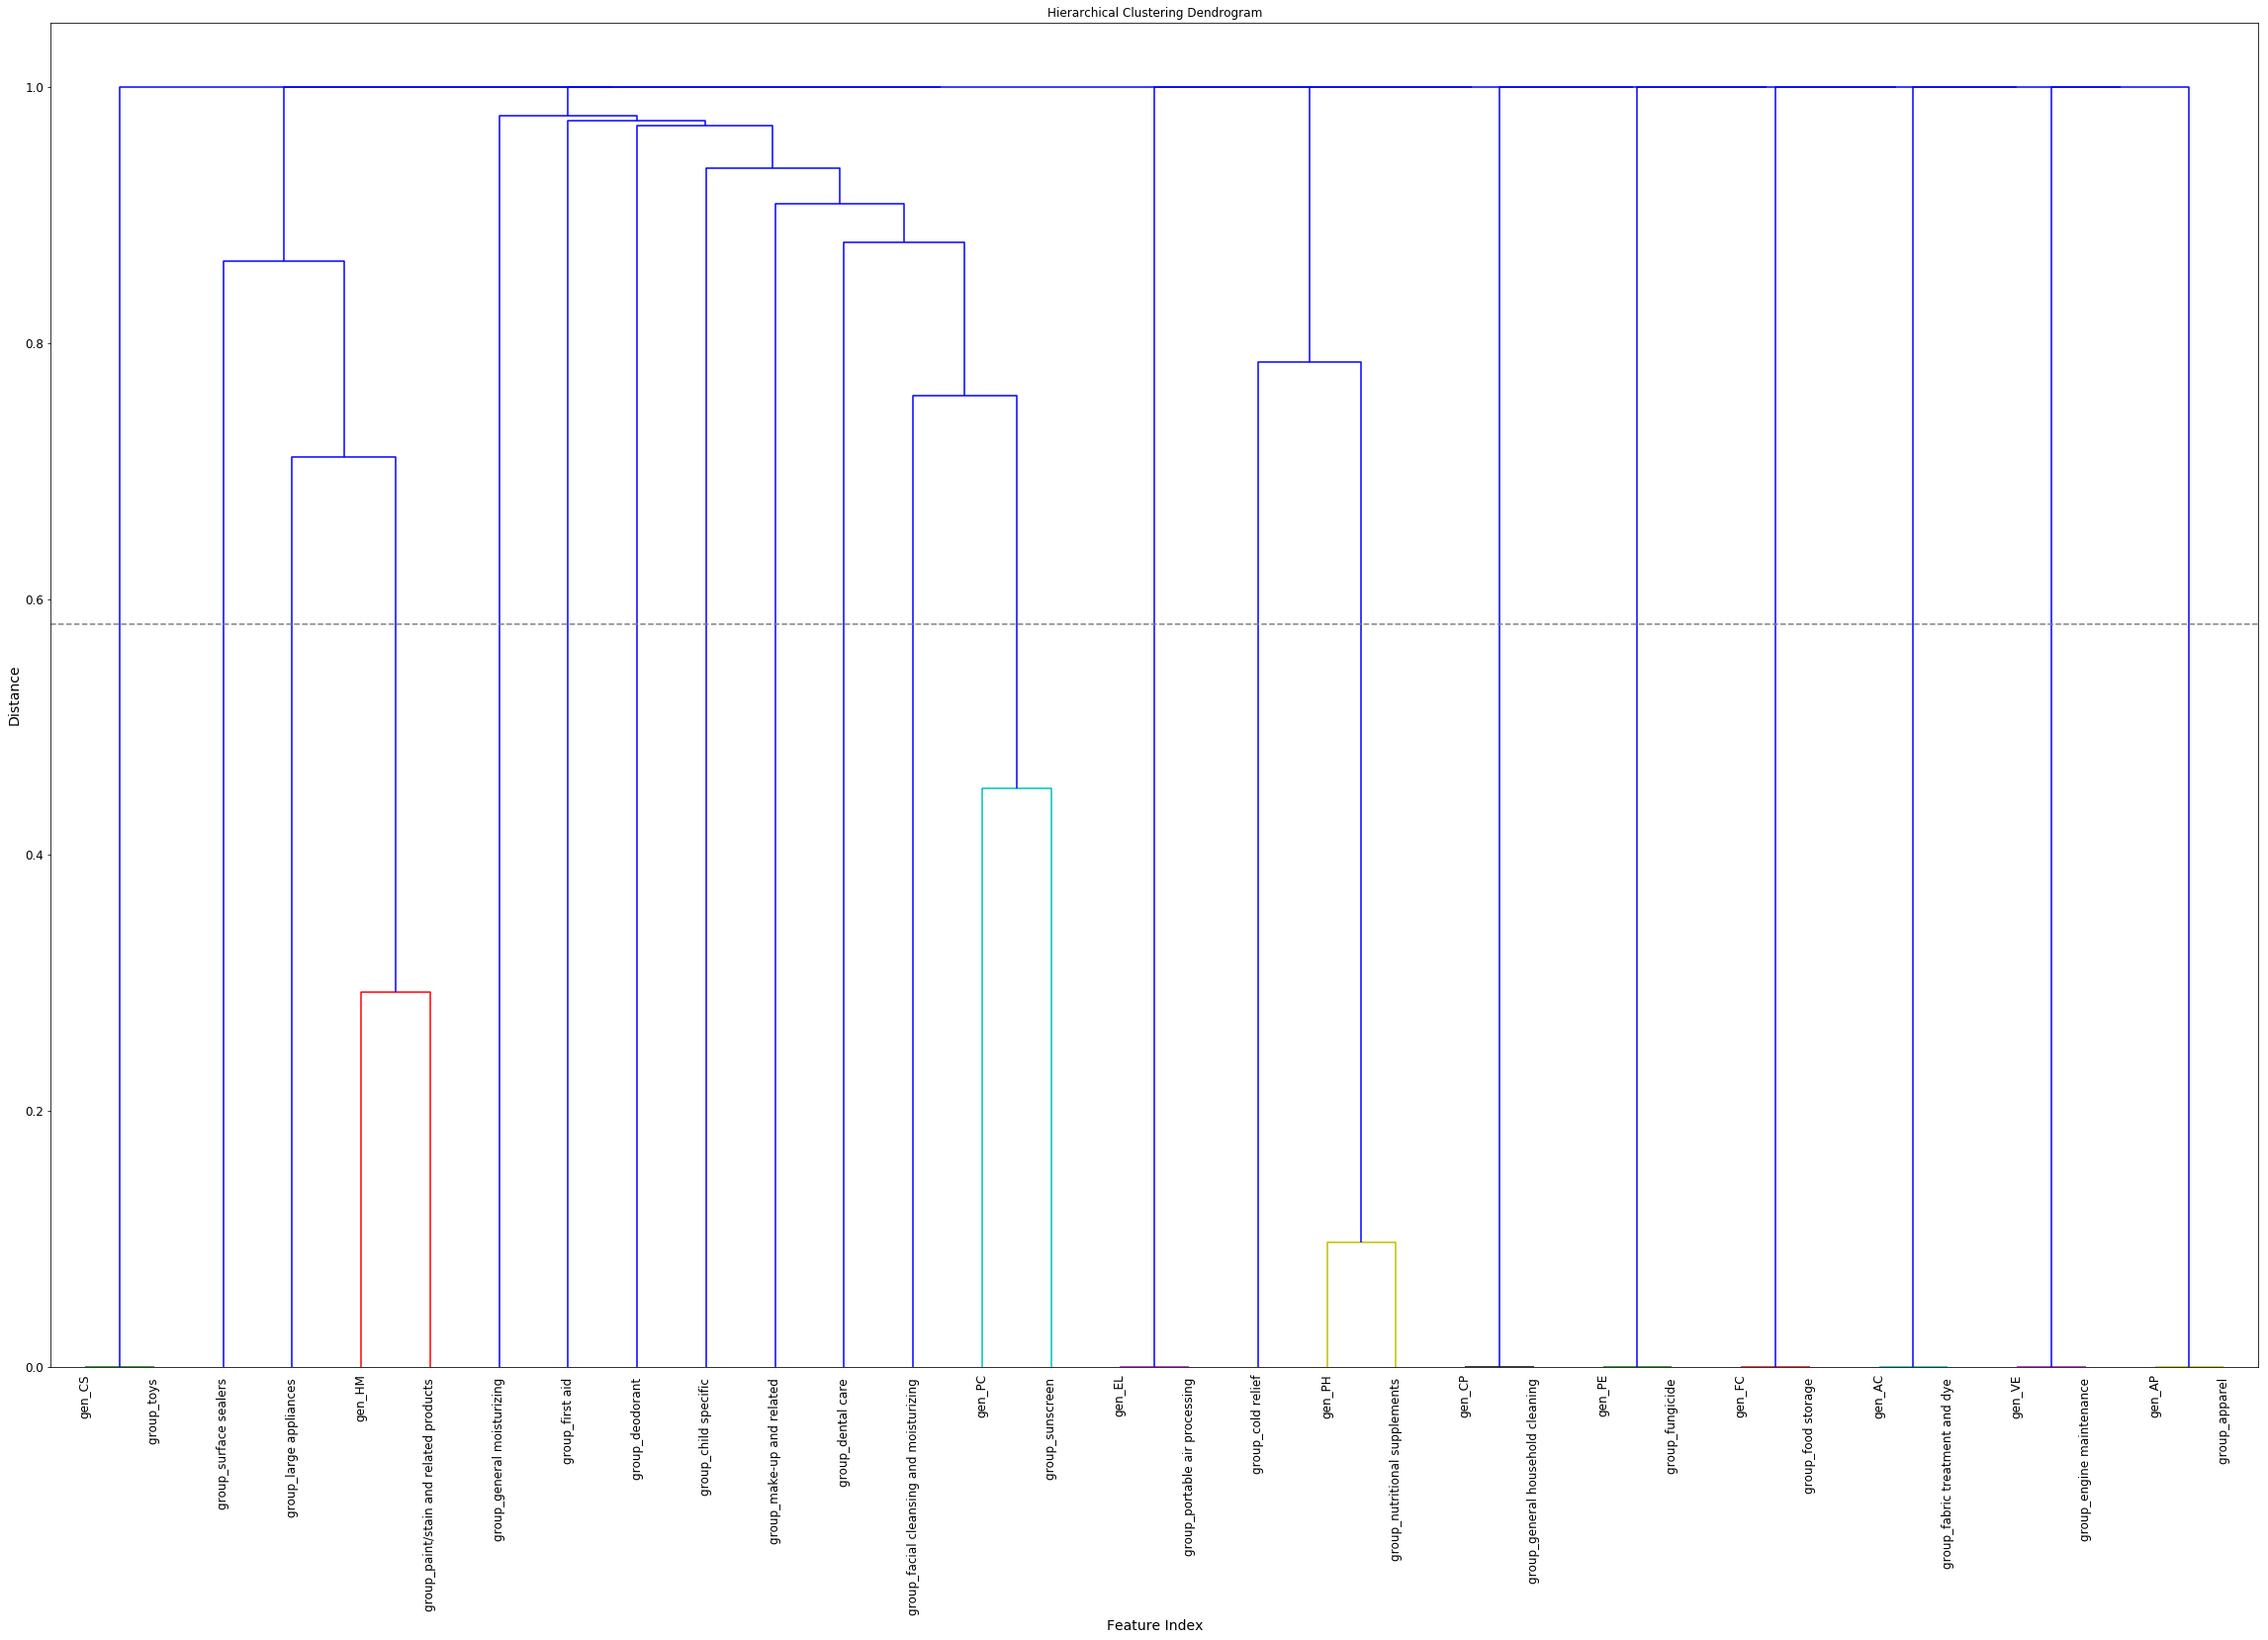

In [70]:
# Calculate full dendrogram
# ENM PUCs only

fig=plt.figure(figsize=(40, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    labels=enm_PUC_names
)
plt.axhline(y=0.58, color='gray', linestyle='--')
plt.show()
savepdf(fig,'enm_cluster_dendrogram_PUC-nomatrix')

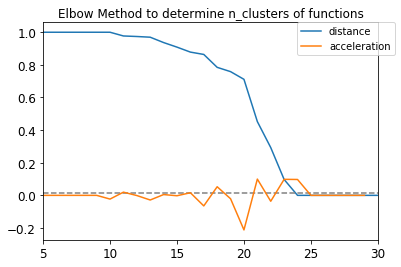

clusters: 21


In [71]:
# Optimize n_clusters with Elbow Method
# Organic functions only

last = Z[-30:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

plt.plot(idxs, last_rev, label='distance')
plt.axhline(y=0.016, color='gray', linestyle='--')
plt.plot(idxs[:-2] + 1, acceleration_rev, label='acceleration')
plt.title('Elbow Method to determine n_clusters of functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.xlim([5,30])
#plt.ylim([-.05,.1])
plt.savefig('./BLTfigs/enm_elbow_PUC-nomatrix.png')
plt.show()

k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

# look for spikes in orange

Clusters to try: 11, 18, 21, 23

### Helper class for selecting best ENM estimator

Estimator Selection Helper by David Batista
http://www.davidsbatista.net/blog/2018/02/23/model_optimization/

In [72]:
# Set up for grid search across multiple pipelines
from sklearn.model_selection import GridSearchCV

cv=10
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=cv, n_jobs=1, verbose=1, scoring='accuracy', refit=False): # scoring=None
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [73]:
# Define sets of models and their respective parameters to compare
# The first dictionary contains the models to be scored
# while the second contains the parameters for each model

from sklearn.cluster import FeatureAgglomeration
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

cv=5
models_b = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC()
}

params_b = {
    'RandomForest': { 'n_estimators': [4,8,12,16]},
    'SVC': [
        {'kernel': ['linear'], 'C': [0.1,1,10,40,100]},
        {'kernel': ['rbf'], 'C': [0.1,1,10,40,100], 'gamma': [0.001,0.1,1]},
    ]
}

In [74]:
# Fit gridsearch models to select best estimator
# All ENM features only
helper_b = EstimatorSelectionHelper(models_b, params_b)
helper_b.fit(Xf_enm+0.00001, bin_num_enm, n_jobs=3)

# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVC.
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.2s finished


In [75]:
# Compare performance for estimators (accuracy)
# Function features only
helper_b.score_summary(sort_by='mean_score')

RandomForest
SVC


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
16,SVC,0.333333,0.638492,1,0.227326,10,0.1,rbf,NaN
21,SVC,0.444444,0.610714,1,0.189917,100,0.001,rbf,NaN
5,SVC,0.333333,0.605159,1,0.212094,1,NaN,linear,NaN
3,RandomForest,0.111111,0.590873,1,0.263155,NaN,NaN,NaN,16
13,SVC,0.444444,0.574206,1,0.179408,1,0.1,rbf,NaN
22,SVC,0.111111,0.565476,0.857143,0.23145,100,0.1,rbf,NaN
6,SVC,0.111111,0.565476,0.857143,0.23145,10,NaN,linear,NaN
7,SVC,0.111111,0.565476,0.857143,0.23145,40,NaN,linear,NaN
8,SVC,0.111111,0.565476,0.857143,0.23145,100,NaN,linear,NaN
19,SVC,0.111111,0.565476,0.857143,0.23145,40,0.1,rbf,NaN


In [76]:
# Fit gridsearch models to select best estimator
# All organics features only
helper_b = EstimatorSelectionHelper(models_b, params_b)
helper_b.fit(Xp_enm, bin_num_enm, n_jobs=3)

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVC.
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.2s finished


In [77]:
# Compare performance for estimators (accuracy)
# Function features only
helper_b.score_summary(sort_by='mean_score')

RandomForest
SVC


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
23,SVC,0.333333,0.590476,0.857143,0.152835,100,1,rbf,NaN
14,SVC,0.333333,0.590476,0.857143,0.152835,1,1,rbf,NaN
20,SVC,0.333333,0.590476,0.857143,0.152835,40,1,rbf,NaN
17,SVC,0.333333,0.590476,0.857143,0.152835,10,1,rbf,NaN
22,SVC,0.333333,0.579365,0.857143,0.150919,100,0.1,rbf,NaN
5,SVC,0.333333,0.579365,0.857143,0.150919,1,NaN,linear,NaN
6,SVC,0.333333,0.579365,0.857143,0.150919,10,NaN,linear,NaN
7,SVC,0.333333,0.579365,0.857143,0.150919,40,NaN,linear,NaN
8,SVC,0.333333,0.579365,0.857143,0.150919,100,NaN,linear,NaN
19,SVC,0.333333,0.579365,0.857143,0.150919,40,0.1,rbf,NaN


### Pipeline/GridSearch to select n_clusters

Have to run fit with [X + a very small number] so that features with very few ones don't go missing during cross validation. https://stats.stackexchange.com/questions/324732/kernel-density-estimator-kde-with-too-many-zeroes-as-input

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import FeatureAgglomeration
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn import preprocessing

In [79]:
# Pipeline/GridSearch to select n_clusters for feature agglomeration
# after selecting ideal estimator
# ENM Functions only

# Pipeline
feat = FeatureAgglomeration(affinity="cosine", linkage="average")
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('feat', feat),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
k_set=[8,10,13]
c_set=[0.5,5,10,20,40]
gamma_set=[0.0001,0.01,0.5,1,5]

# Gridsearch
param_grid={'feat__n_clusters': k_set,
            'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=3)
grid_search.fit(Xf_enm+.0001,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 20, 'estimator__gamma': 0.01, 'feat__n_clusters': 13}
0.6585365853658537


In [83]:
# Pipeline/GridSearch to select n_clusters for feature agglomeration
# after selecting ideal estimator
# ENM PUCs only

# Pipeline
feat = FeatureAgglomeration(affinity="cosine", linkage="average")
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('feat', feat),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
k_set=[11,18,21,23]
c_set=[0.5,5,10,20,40]
gamma_set=[0.0001,0.01,0.5,1,5]

# Gridsearch
param_grid={'feat__n_clusters': k_set,
            'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=3)
grid_search.fit(Xp_enm+.0001,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 5, 'estimator__gamma': 1, 'feat__n_clusters': 21}
0.5975609756097561


### Apply feature agglomeration using optimized n_clusters

In [84]:
# Apply feature agglomeration
# Functions only

agg = FeatureAgglomeration(n_clusters=13, affinity="cosine", linkage="average")
Xf_enm_red = agg.fit_transform(Xf_enm+0.0001) # fit to data, then transform it

In [85]:
Xf_enm_red = pd.DataFrame(Xf_enm_red)
print(Xf_enm_red.shape)

(82, 13)


In [86]:
# Apply feature agglomeration
# Product categories only

agg = FeatureAgglomeration(n_clusters=21, affinity="cosine", linkage="average")
Xp_enm_red = agg.fit_transform(Xp_enm+0.0001) # fit to data, then transform it

In [87]:
Xp_enm_red = pd.DataFrame(Xp_enm_red)
print(Xp_enm_red.shape)

(82, 21)


In [133]:
# Concatenate all clustered and scaled features into new dataframe
XX_enm = pd.concat([Xc_enm,Xf_enm_red,Xp_enm_red,Xm_enm['refined_spray']], axis=1)
XX_enm.loc[0:3,]

,propMW,propMP,propBP,propDensity,0,1,2,3,4,5,...,12,13,14,15,16,17,18,19,20,refined_spray
0,79.867,1843.00,2972.0,4.230,0.5001,0.0001,0.0001,0.0001,0.0001,1.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0
1,63.546,1083.00,2567.0,8.960,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0
2,65.370,419.53,907.0,7.140,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0
3,107.868,961.78,2162.0,10.345,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0001,0.0001,0


In [88]:
# Scale pchem properties
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xc_enm_scaled = scaler.fit_transform(Xc_enm)
Xc_enm_scaled = pd.DataFrame(data=Xc_enm_scaled)

In [91]:
# Concatenate all clustered and scaled features into new (alternate) dataframe
XX_enm_scaled = pd.concat([Xc_enm_scaled,Xf_enm_red,Xp_enm_red,Xm_enm], axis=1)
XX_enm_scaled.loc[0:3,]
#XX_scaled=np.array(XX_scaled)
#print(XX_scaled.shape)

,0,1,2,3,0,1,2,3,4,5,...,15,16,17,18,19,20,refined_NOC,refined_spray,matrix_A,matrix_F
0,0.159910,0.728168,0.611018,0.082634,0.5001,0.0001,0.0001,0.0001,0.0001,1.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1,0,0,1
1,0.078351,0.387819,0.502819,0.321179,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1,0,0,1
2,0.087466,0.090699,0.059336,0.229392,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1,0,0,1
3,0.299836,0.333533,0.394619,0.391028,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,1.0001,0.0001,1,0,0,1


# Core models

## Clustering, regression Model

In [97]:
# Define sets of models and their respective parameters to compare
# The first dictionary contains the models to be scored
# while the second contains the parameters for each model

#from sklearn import model_selection, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

njobs=3
models = {
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

params = {
    'RandomForest': { 'n_estimators': [4, 8, 12, 16] },
    'SVR': [
        {'kernel': ['linear'], 'C': [1, 10, 30]},
        {'kernel': ['rbf'], 'C': [1, 5, 10, 20, 30, 40, 50], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
    ]
}

In [98]:
# Fit gridsearch models to select best estimator

helper = EstimatorSelectionHelper(models, params)
helper.fit(XX_enm_scaled+0.0001, np.log10(yarr_enm), n_jobs=n_jobs, scoring='explained_variance') # n_jobs=1 by default

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVR.
Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done 380 out of 380 | elapsed:    0.5s finished


In [99]:
# Compare performance for estimators
helper.score_summary(sort_by='mean_score')

RandomForest
SVR


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
32,SVR,-0.513492,0.0207757,0.333293,0.206497,40,0.0001,rbf,NaN
27,SVR,-0.416609,0.0173717,0.257928,0.166132,30,0.0001,rbf,NaN
13,SVR,-0.665402,0.0163535,0.395061,0.259681,5,0.001,rbf,NaN
22,SVR,-0.274367,0.0161638,0.177928,0.112245,20,0.0001,rbf,NaN
37,SVR,-0.669177,0.0161161,0.396301,0.26091,50,0.0001,rbf,NaN
17,SVR,-0.142104,0.00990948,0.100694,0.0597082,10,0.0001,rbf,NaN
8,SVR,-0.141436,0.00989376,0.100484,0.059471,1,0.001,rbf,NaN
12,SVR,-0.0682961,0.00671308,0.0575282,0.0305785,5,0.0001,rbf,NaN
7,SVR,-0.0132183,0.00165245,0.0125849,0.00626495,1,0.0001,rbf,NaN
9,SVR,-1.22719,-0.0133282,0.505237,0.438659,1,0.01,rbf,NaN


## PCA, regression Model

In [104]:
# Fit gridsearch models to select best estimator

helper2 = EstimatorSelectionHelper(models, params)
helper2.fit(dim_red_enm, np.log10(yarr_enm), n_jobs=n_jobs, scoring='explained_variance') # n_jobs=1 by default

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVR.
Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Done 380 out of 380 | elapsed:    0.4s finished


In [105]:
# Compare performance for estimators
helper2.score_summary(sort_by='mean_score')

RandomForest
SVR


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
32,SVR,-0.651067,0.0225565,0.403946,0.257446,40,0.0001,rbf,NaN
27,SVR,-0.505448,0.0204733,0.323292,0.202159,30,0.0001,rbf,NaN
22,SVR,-0.337111,0.019461,0.229944,0.138707,20,0.0001,rbf,NaN
13,SVR,-0.808138,0.0158535,0.437514,0.30763,5,0.001,rbf,NaN
37,SVR,-0.811724,0.0156818,0.438501,0.308798,50,0.0001,rbf,NaN
17,SVR,-0.173142,0.01356,0.129426,0.0740582,10,0.0001,rbf,NaN
8,SVR,-0.172069,0.0134623,0.128669,0.0736189,1,0.001,rbf,NaN
12,SVR,-0.0823971,0.00889996,0.0723951,0.037623,5,0.0001,rbf,NaN
7,SVR,-0.0158116,0.00251212,0.017343,0.00798544,1,0.0001,rbf,NaN
9,SVR,-1.5525,-0.0340358,0.576013,0.542043,1,0.01,rbf,NaN


In [107]:
# Pipeline/GridSearch to find best optimized model
# after selecting ideal estimator

# Pipeline
estimator = SVR(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[30,35,40,35]
gamma_set=[0.00003,0.0001,0.0003,0.001]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
#grid_search.fit(XX,y_log)
grid_search.fit(dim_red_enm+.0001,np.log10(yarr_enm))
print(grid_search.best_params_)
print(grid_search.best_score_)

{'estimator__C': 40, 'estimator__gamma': 0.0003}
0.005139389822598872


## Compare feature predictivity

In [159]:
# SVR-RBF with WF bins
    # Function features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xf_enm+0.0001,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 1.623776739188721, 'estimator__gamma': 0.23357214690901212}
0.634146341463


In [160]:
# SVR-RBF with WF bins
    # Product category features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xp_enm+0.0001,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.78475997035146106, 'estimator__gamma': 0.48329302385717521}
0.585365853659


In [161]:
# SVR-RBF with WF bins
    # Chemical property features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xc_enm+0.0001,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 61.584821106602604, 'estimator__gamma': 1.0}
0.59756097561


In [113]:
# SVR-RBF with WF bins
    # Chemical property features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xm_enm+0.0001,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.4832930238571752}
0.4878048780487805


## PCA, WF Bins

In [108]:
# SVR-RBF with all features, normalized
    # ENM weight fractions (PCA)
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight=None)
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_enm,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 14.38449888287663, 'estimator__gamma': 0.012742749857031322}
0.6463414634146342


In [109]:
# SVR-RBF with all features, normalized
    # ENM weight fractions (PCA)
    # Explained variance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight=None)
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_enm,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.11288378916846883}
0.31160725453408383


In [507]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf', C=3, gamma=0.1))
     ])
bestpipe.fit(XX_enm,bin_num_enm)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [513]:
# Predictions for ENM WF
y_enm_predict=bestpipe.predict(XX_enm) 

(55,)


In [515]:
# Accuracy score of model
from sklearn.metrics import accuracy_score
accuracy_score(bin_num_enm, y_enm_predict, normalize=True, sample_weight=None)

0.81818181818181823

In [155]:
# Make a confusion matrix to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31  1  0]
 [ 4 10  0]
 [ 2  3  4]]
Normalized confusion matrix
[[ 0.97  0.03  0.  ]
 [ 0.29  0.71  0.  ]
 [ 0.22  0.33  0.44]]


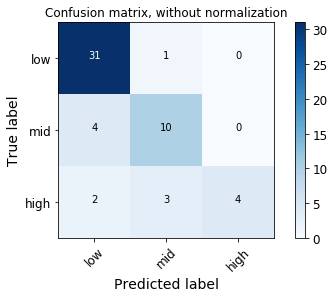

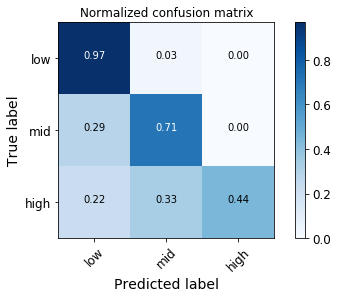

In [556]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_num_enm, y_enm_predict)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## NEW ENM Model (Clusters)

In [139]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(XX_enm,bin_num_enm) #dim_red_enm
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.scoring)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 29.76351441631316, 'estimator__gamma': 0.026366508987303555}
0.6219512195121951
accuracy


Essentially leave one out cross validation, slight biases, might be overfitting

In [140]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', C=29.7635144, gamma=0.0263665))
     ])

In [141]:
# Make a confusion matrix to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [142]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True)
cnf_matrix2=np.zeros([3,3])
X=np.array(XX_enm)
y=np.array(bin_num_enm)
for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);

In [143]:
cnf_matrix=cnf_matrix2.astype(np.int)

Confusion matrix, without normalization
[[29  3  4]
 [ 9 16  4]
 [ 3  5  9]]
Normalized confusion matrix
[[0.81 0.08 0.11]
 [0.31 0.55 0.14]
 [0.18 0.29 0.53]]


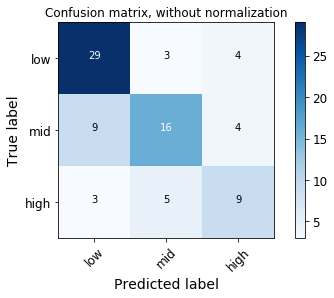

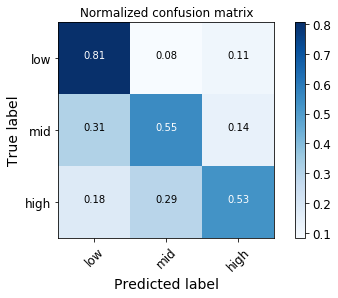

In [144]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_num_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[32  2  2]
 [10 15  4]
 [ 5  1 11]]
Normalized confusion matrix
[[0.89 0.06 0.06]
 [0.34 0.52 0.14]
 [0.29 0.06 0.65]]


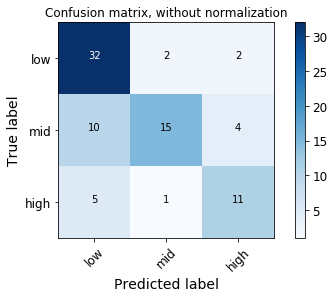

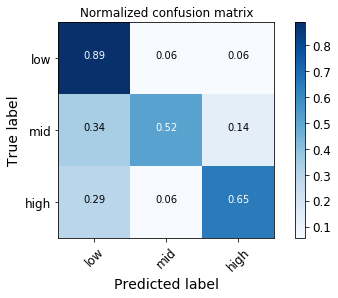

In [126]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_num_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## NEW ENM Model (PCA)

In [145]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_enm,bin_num_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.05455594781168514}
0.5853658536585366


In [146]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', C=0.7847600, gamma=0.0545559))
     ])
bestpipe.fit(dim_red_enm,bin_num_enm)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=0.78476, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0545559, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [147]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True)
cnf_matrix2=np.zeros([3,3])
X=np.array(XX_enm)
y=np.array(bin_num_enm)
for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);

In [149]:
cnf_matrix=cnf_matrix2.astype(np.int)

Confusion matrix, without normalization
[[29  4  3]
 [11 11  7]
 [ 5  1 11]]
Normalized confusion matrix
[[0.81 0.11 0.08]
 [0.38 0.38 0.24]
 [0.29 0.06 0.65]]


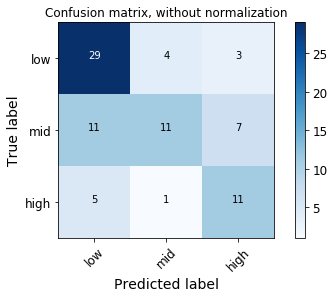

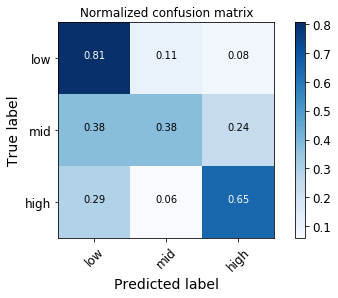

In [151]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_num_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [153]:
# TODO: correlation matrix of features vs 
enm_corr = pd.concat(XX_enm,y_enm.apply(np.log10(), axis=1)) #np.log10(yarr_enm)
plt.matshow(enm_corr.corr())

ValueError: invalid number of arguments